# **OSTEOPOROSIS PREDICTION USING MACHINE LEARNING**

**Library Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold,cross_val_score
myKfold=KFold(n_splits=5)



**Dataset Loading**

In [ ]:
data=pd.read_csv("/content/osteoporosisfinal.csv")
print(data)

           Id  Age  Gender         Hormone FHistory              Race  \
0     1734616   69  Female          Normal      Yes             Asian   
1     1419098   32  Female          Normal      Yes             Asian   
2     1797916   89  Female  Postmenopausal       No         Caucasian   
3     1805337   78  Female          Normal       No         Caucasian   
4     1351334   38    Male  Postmenopausal      Yes  African American   
...       ...  ...     ...             ...      ...               ...   
1953  1991635   19  Female          Normal      Yes  African American   
1954  1528601   23  Female  Postmenopausal      Yes         Caucasian   
1955  1990957   34  Female  Postmenopausal       No  African American   
1956  1779848   25    Male  Postmenopausal       No  African American   
1957  1282963   26  Female  Postmenopausal       No  African American   

           Weight CalciumIn   Activity Smoking          MedCondition  \
0     Underweight       Low  Sedentary     Yes  Rhe

**Dropping out the insignificant columns**

In [ ]:
data=data.drop(["Id","Race","Medications"],axis=1)
print(data)

      Age  Gender         Hormone FHistory       Weight CalciumIn   Activity  \
0      69  Female          Normal      Yes  Underweight       Low  Sedentary   
1      32  Female          Normal      Yes  Underweight       Low  Sedentary   
2      89  Female  Postmenopausal       No       Normal  Adequate     Active   
3      78  Female          Normal       No  Underweight  Adequate  Sedentary   
4      38    Male  Postmenopausal      Yes       Normal       Low     Active   
...   ...     ...             ...      ...          ...       ...        ...   
1953   19  Female          Normal      Yes       Normal  Adequate  Sedentary   
1954   23  Female  Postmenopausal      Yes  Underweight       Low     Active   
1955   34  Female  Postmenopausal       No  Underweight       Low  Sedentary   
1956   25    Male  Postmenopausal       No       Normal       Low  Sedentary   
1957   26  Female  Postmenopausal       No  Underweight  Adequate  Sedentary   

     Smoking          MedCondition Frac

**Searching for null data**

<Axes: >

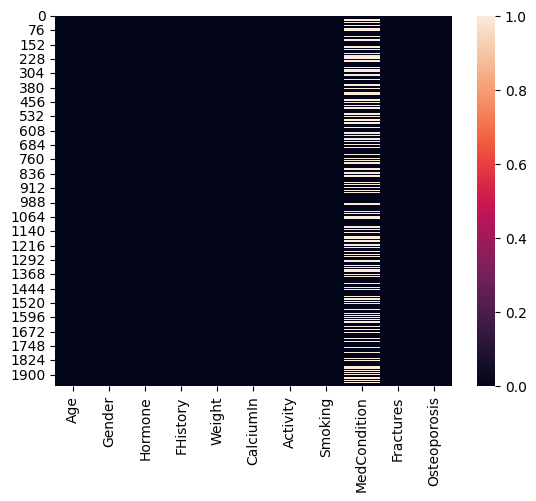

In [ ]:
sns.heatmap(data.isnull())

**Convert Categorical data to Numerical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Hormone']=le.fit_transform(data['Hormone'])
data['FHistory']=le.fit_transform(data['FHistory'])
data['Weight']=le.fit_transform(data['Weight'])
data['MedCondition']=le.fit_transform(data['MedCondition'])
data['Fractures']=le.fit_transform(data['Fractures'])
data['CalciumIn']=le.fit_transform(data['CalciumIn'])
data['Activity']=le.fit_transform(data['Activity'])
data['Smoking']=le.fit_transform(data['Smoking'])
print(data)

      Age  Gender  Hormone  FHistory  Weight  CalciumIn  Activity  Smoking  \
0      69       0        0         1       1          1         1        1   
1      32       0        0         1       1          1         1        0   
2      89       0        1         0       0          0         0        0   
3      78       0        0         0       1          0         1        1   
4      38       1        1         1       0          1         0        1   
...   ...     ...      ...       ...     ...        ...       ...      ...   
1953   19       0        0         1       0          0         1        1   
1954   23       0        1         1       1          1         0        0   
1955   34       0        1         0       1          1         1        0   
1956   25       1        1         0       0          1         1        1   
1957   26       0        1         0       1          0         1        1   

      MedCondition  Fractures  Osteoporosis  
0                

**Eliminating Null values**

In [ ]:
avgage=data['MedCondition'].mean()
data.fillna({'MedCondition':avgage},inplace=True)

**Pairplot Demonstration:**

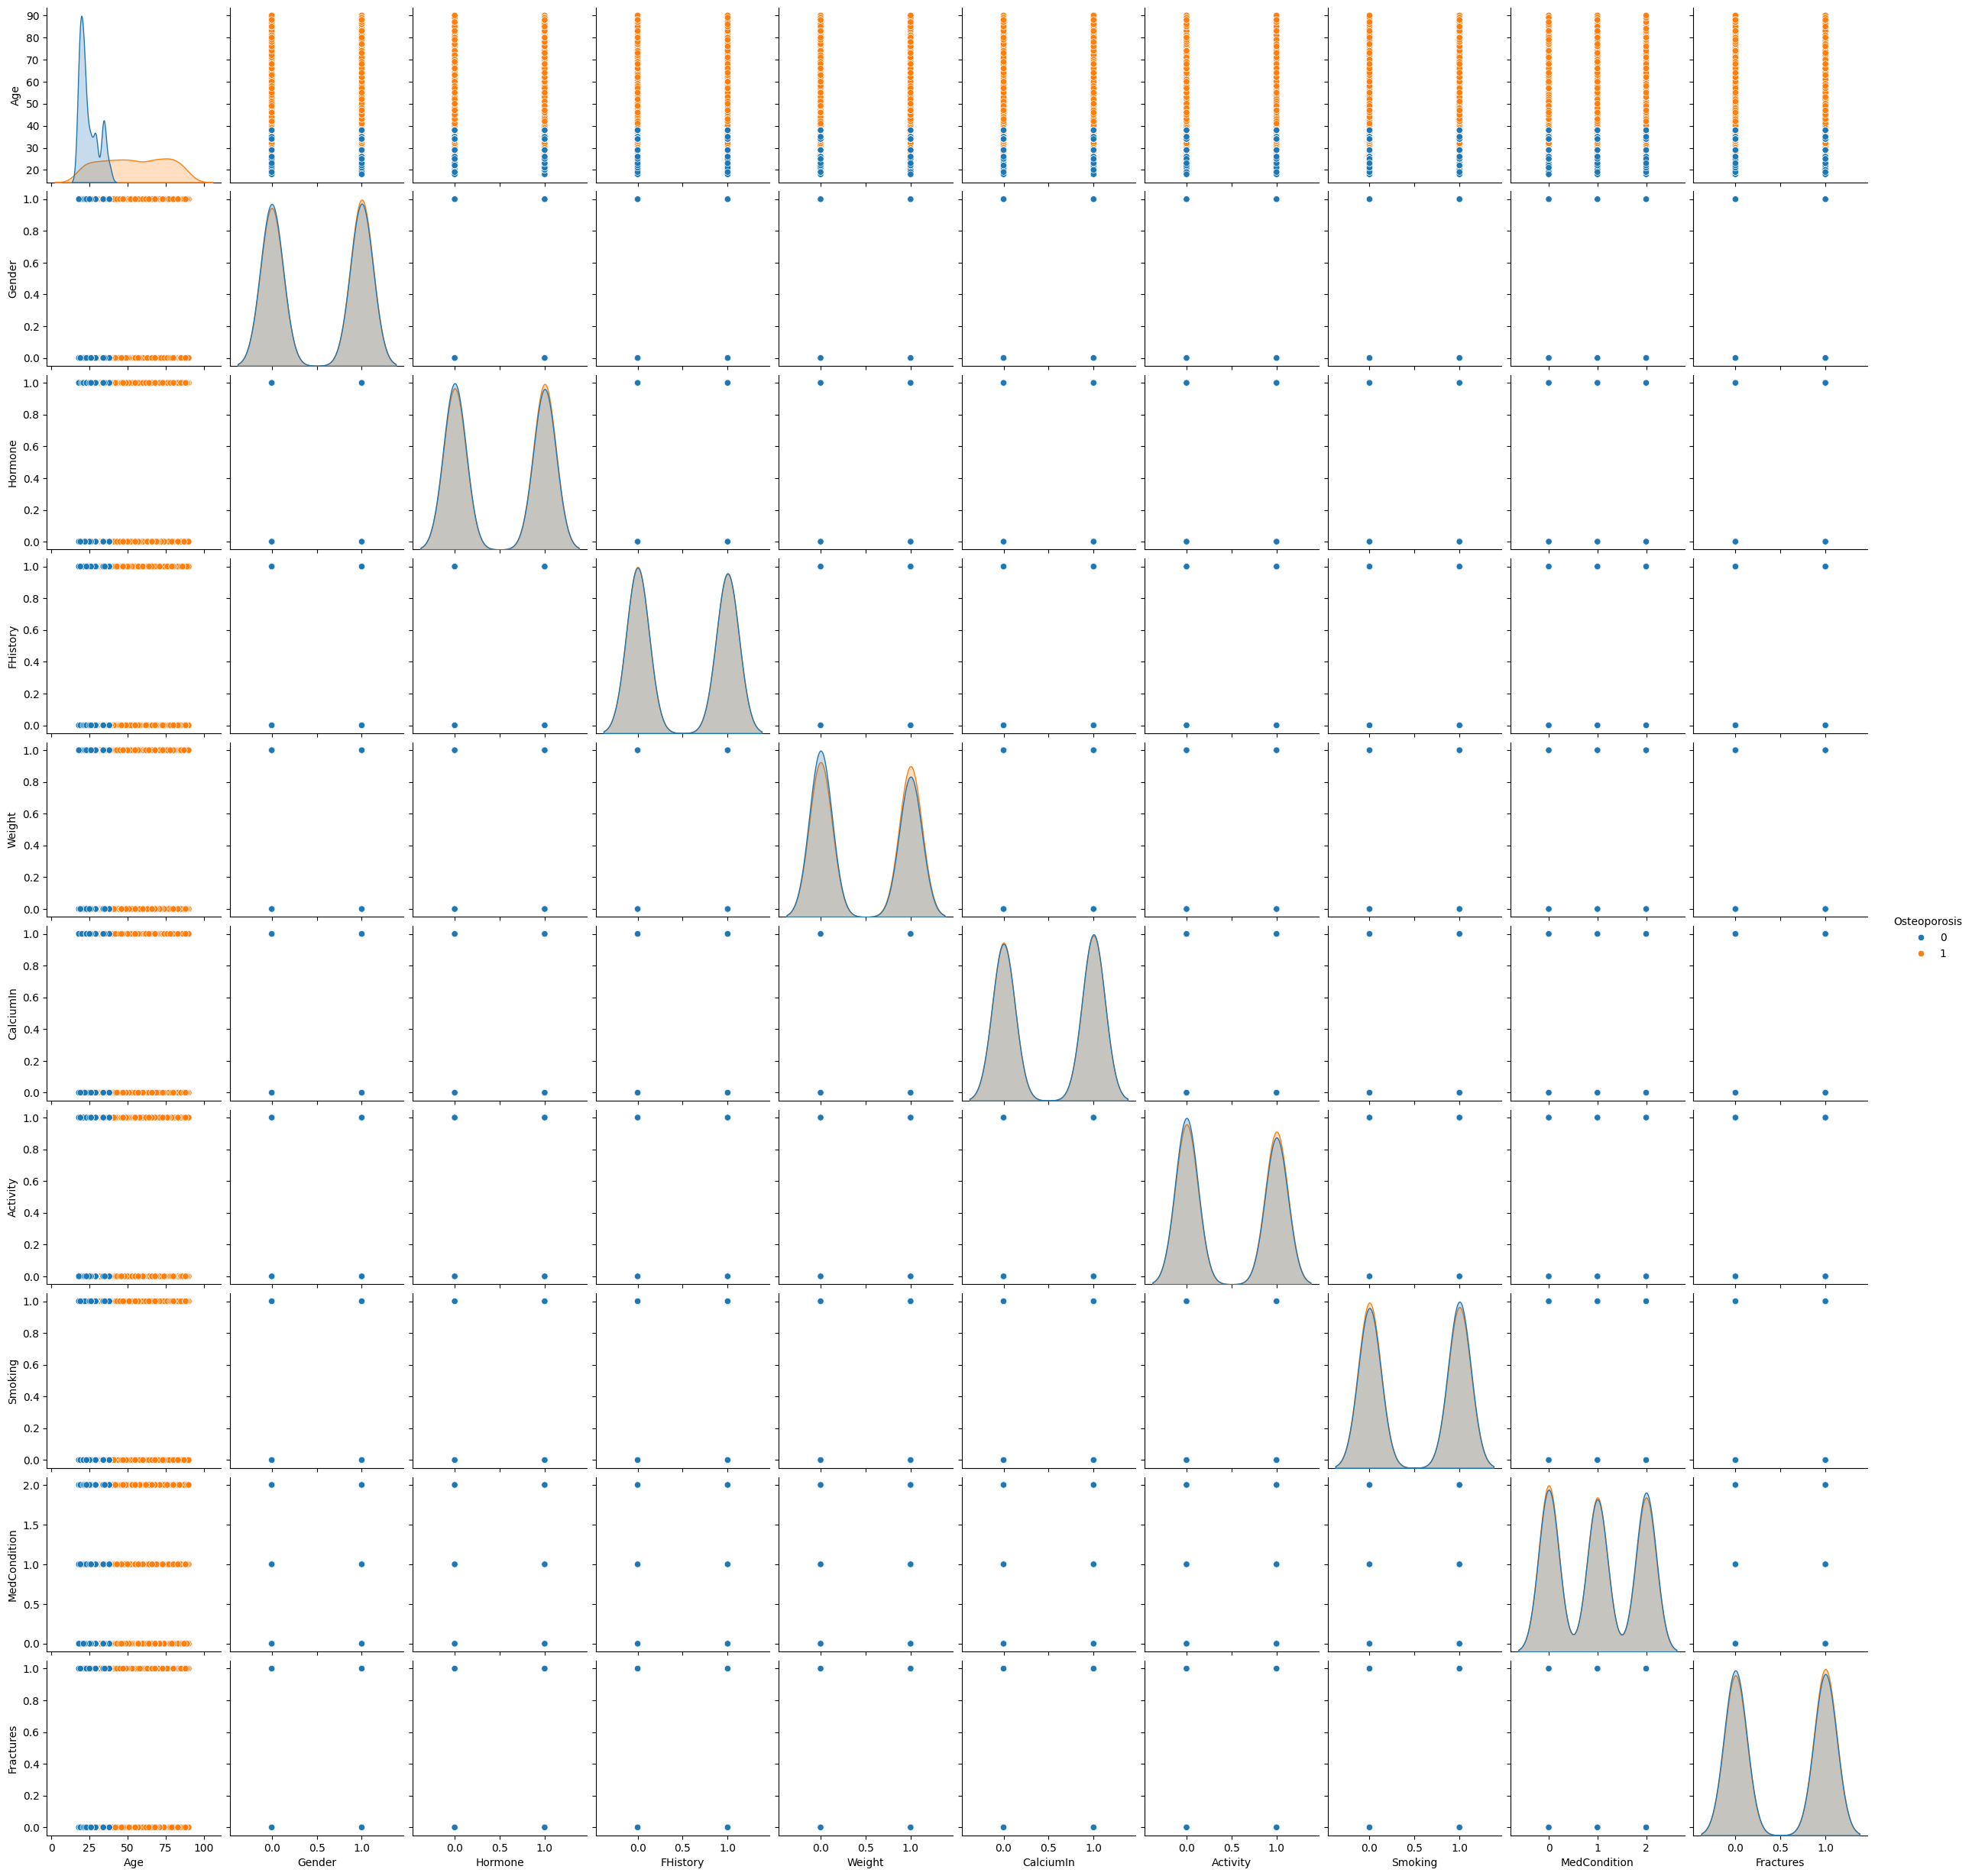

In [ ]:
sns.pairplot(data,hue="Osteoporosis")

**Data Splitting:**

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=0,shuffle=True)

**Using K-Nearest Neighbor(KNN) Algorithm for finding accuracy**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knmodel=KNeighborsClassifier(n_neighbors=7)
knmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
inp=[[38,1,1,1,0,1,0,1,1,1]]
yp=knmodel.predict(inp)
print(yp)

[0]


Finding Confusion Matrix

[[383  11]
 [ 76 314]]


<Axes: >

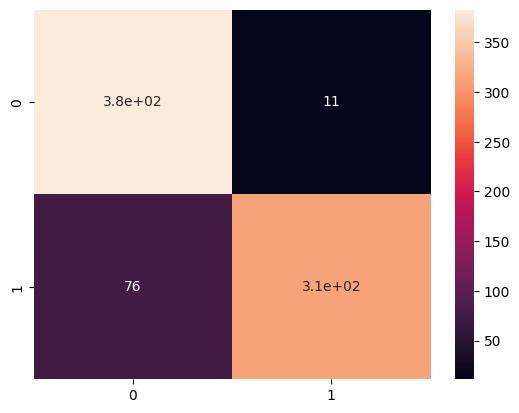

In [ ]:
y_pred=knmodel.predict(x_test)
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

[[383  11]
 [ 76 314]]


<Axes: >

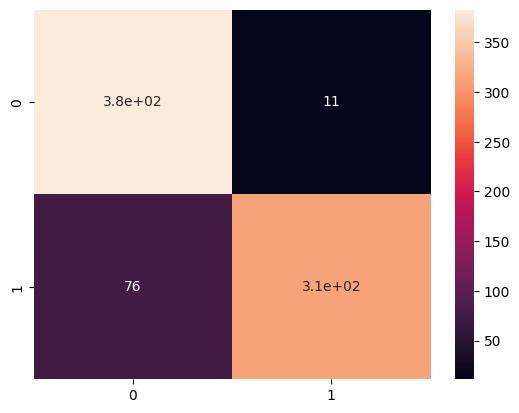

In [ ]:
y_pred=knmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy score

In [ ]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.889030612244898


Finding KFold:

In [ ]:
mysc=cross_val_score(knmodel,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of KNN"+str(mysc.mean()))

[0.87898089 0.9044586  0.84076433 0.87898089 0.87820513]
Kfold of KNN0.8762779683161849


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

 **Using Logistic Regression Algorithm for finding accuracy**

In [ ]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(x_train,y_train)

LogisticRegression()

In [ ]:
inp=[[38,1,1,1,0,1,0,1,1,1]]
yp=logm.predict(inp)
print(yp)

[1]


Confusion Matrix:

[[255  41]
 [ 56 236]]


<Axes: >

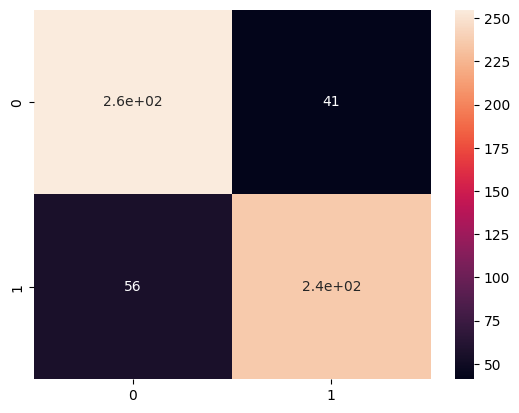

In [ ]:
y_pred=logm.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy score:

In [ ]:
ac=accuracy_score(y_test,y_pred)
print(ac)


0.8350340136054422


Finding KFold:

In [ ]:
mysc=cross_val_score(logm,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of LogisticRegression"+str(mysc.mean()))

[0.81355932 0.89830508 0.83898305 0.85470085 0.88888889]
Kfold of LogisticRegression0.8588874402433724


**Using Gaussian Naive Bayes Algorithm for finding accuracy**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

Confusion matrix:

[[288   8]
 [ 64 228]]


<Axes: >

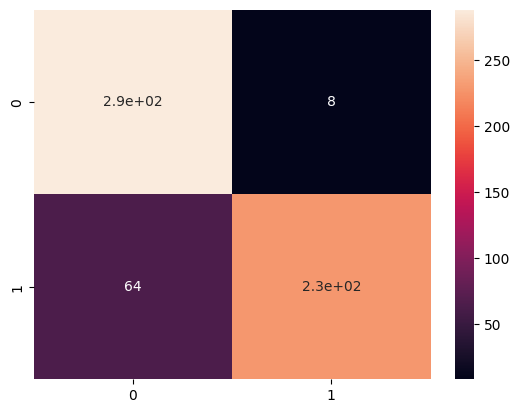

In [ ]:
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy score:

In [ ]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.8775510204081632


Finding KFold:

In [ ]:
mysc=cross_val_score(nb,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of GaussianNB"+str(mysc.mean()))

[0.8220339  0.90677966 0.84745763 0.88034188 0.90598291]
Kfold of GaussianNB0.8725191945530929


**Using Support vector machine algorithm for finding accuracy**

In [ ]:
from sklearn.svm import SVC
svmodel=SVC(kernel="linear")
svmodel.fit(x_train,y_train)

SVC(kernel='linear')

Confusion matrix:

[[288   8]
 [ 64 228]]


<Axes: >

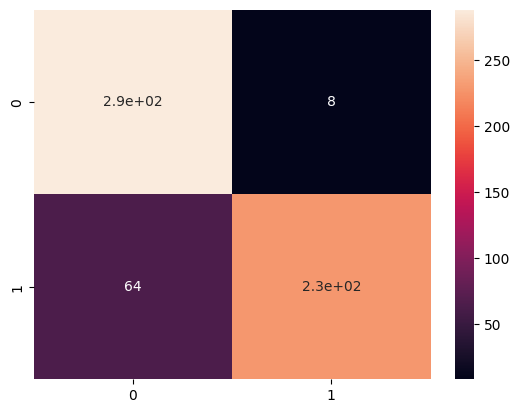

In [ ]:
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy score:

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=svmodel.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.8622448979591837


Finding Kmodel:

In [ ]:
mysc=cross_val_score(svmodel,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of SVC"+str(mysc.mean()))

[0.81355932 0.88983051 0.83898305 0.84615385 0.8974359 ]
Kfold of SVC0.8571925249891352


**Using Decision Tree algorithm for finding accuracy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Confusion matrix:

[[288   8]
 [ 64 228]]


<Axes: >

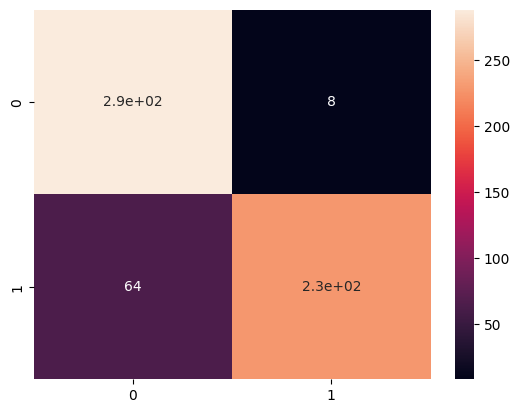

In [ ]:
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy score:

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=dt.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.8537414965986394


Finding KFold:

In [ ]:
mysc=cross_val_score(dt,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of DecisionTreeClassifier"+str(mysc.mean()))

[0.8220339  0.88135593 0.84745763 0.88034188 0.78632479]
Kfold of DecisionTreeClassifier0.843502824858757


**Using Random Forest Algorithm for finding accuracy**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

Confusion matrix:

[[288   8]
 [ 64 228]]


<Axes: >

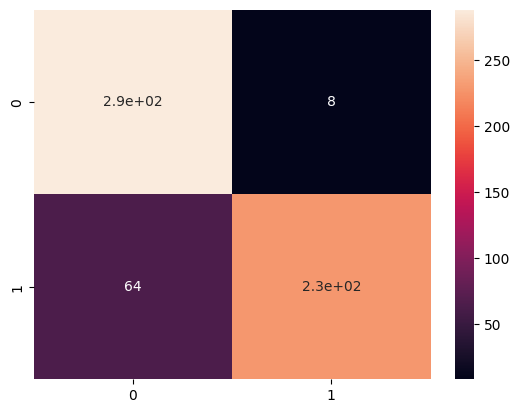

In [ ]:
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
sns.heatmap (cn,annot=True)

Accuracy Score:

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=rf.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.8656462585034014


Finding KFold:

In [ ]:
mysc=cross_val_score(rf,x_test,y_test,cv=myKfold)
print(mysc)
print("Kfold of RandomForestClassifier"+str(mysc.mean()))

[0.8220339  0.89830508 0.87288136 0.85470085 0.8974359 ]
Kfold of RandomForestClassifier0.8690714182239606
